In [1]:
#In this notebook, I have explained usage of XLNet
#you can check explanations in 
#   https://celikkam.medium.com/

In [37]:

from transformers import XLNetTokenizer, XLNetModel
import torch
from scipy.spatial.distance import cosine
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import spacy
import numpy as np
import matplotlib
from tqdm import tqdm

In [3]:
def map_on_3d(data_2d,words,color_mapping:None,exceptional_words=[],use_word_colors=False,fig_size=[19,11],title=""):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(fig_size[0], fig_size[1])

    ax = plt.axes(projection ="3d")
    #scatter result words
    ax.scatter3D(data_2d[:, 0], data_2d[:, 1], data_2d[:, 2])
    plt.title(title)        
    #put an annotation on x,y cordinates for words
    for i, word in enumerate(words):
        if color_mapping is not None:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color=color_mapping[i] )
        elif word in exceptional_words:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#0000ff' )
        elif use_word_colors:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color=get_color(word))
        elif "eat" in word:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#0000ff')
        elif "drink" in word:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#00ff00')
        elif "read" in word:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#ff0000')     
        else:
            ax.text(data_2d[i, 0], data_2d[i, 1], data_2d[i, 2],word,color='#ff00dd')
    plt.show()

def get_color_mapping(Ys,color_by="verb"):
  
  mapped_colors = []
  if color_by == "verb":    
    colors =["#ff0000","#00dd00","#0000dd"] 
    verbs = ["eat","drink"," read"] #bread has "read" process carefully
    for y in Ys:
      indexes = [i for i,verb in enumerate(verbs) if y.find(verb) > -1]
      mapped_colors.append(colors[indexes[0]] )
  elif color_by == "object":    
    colors =["#ff0000","#aaaa00","#00ff00","#000220","#0000ff","#00aaaa"] 
    objects = ["apple","bread","water","beer","book","newspaper"]
    for y in Ys:
      indexes = [i for i,object in enumerate(objects) if y.find(object) > -1]
      mapped_colors.append(colors[indexes[0]] )    
  elif color_by == "index10":    
    colors =["#ff0000","#00ff00","#0000ff"]     
    for index,y in enumerate(Ys):
      index_color = index // 10 
      mapped_colors.append(colors[index_color] )
  elif color_by == "index6":    
    colors =["#ff0000","#00ff00","#0000ff"]     
    for index,y in enumerate(Ys):
      index_color = index // 6 
      mapped_colors.append(colors[index_color] )      
  else:
    colors =["#ff0000","#aaaa00","#00ff00","#000220","#0000ff","#00aaaa"] 
    for index,y in enumerate(Ys):      
      mapped_colors.append(colors[ index % len(colors)] )    
    
  return mapped_colors  

def map_on_2d(data_2d,words,color_mapping:None,exceptional_words=[],use_word_colors=False,fig_size=[16,11],title=""):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(fig_size[0], fig_size[1])

    #scatter result words
    plt.scatter(data_2d[:, 0], data_2d[:, 1])        
    plt.title(title)
    #put an annotation on x,y cordinates for words
    for i, word in enumerate(words):
        if color_mapping is not None:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color=color_mapping[i] )
        elif word in exceptional_words:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#0000ff' )
        elif use_word_colors:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color=get_color(word))
        elif "eat" in word:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#0000ff')
        elif "drink" in word:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#00ff00')
        elif "read" in word:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#ff0000')     
        else:
            plt.annotate(word, xy=(data_2d[i, 0], data_2d[i, 1]),color='#ff00dd')
    plt.show()   

def dump_on_surface(Xs,Ys,fitting="tsne",dump_3d=True,dump_2d=True,color_by="verb",title=""):    
    color_mapping = get_color_mapping(Ys,color_by)
    #print(color_mapping)
    X_transformed = None                         
    if dump_3d:    
        X_transformed = None
        if fitting == "tsne" :
            X_transformed = TSNE(n_components=3).fit_transform(np.array(Xs))
        elif fitting == "pcatsne" :    
            X_transformed = PCA(n_components=20).fit_transform(np.array(Xs))   
            X_transformed = TSNE(n_components=3).fit_transform(np.array(X_transformed))
        else:
            X_transformed = PCA(n_components=3).fit_transform(np.array(Xs))          
        map_on_3d(np.array(X_transformed),Ys,color_mapping=color_mapping,use_word_colors=False,fig_size=[9,9],title=title)
        
    if dump_2d:    
        X_transformed = None
        if fitting == "tsne" :
            X_transformed = TSNE(n_components=2).fit_transform(np.array(Xs))
        elif fitting == "pcatsne" :    
            X_transformed = PCA(n_components=20).fit_transform(np.array(Xs))   
            X_transformed = TSNE(n_components=2).fit_transform(np.array(X_transformed))    
        else:
            pca = PCA(n_components=2)
            X_transformed = pca.fit_transform(np.array(Xs))        
            #pca.explained_variance_
        map_on_2d(np.array(X_transformed),Ys,color_mapping=color_mapping,use_word_colors=False,fig_size=[9,9],title=title)
    return X_transformed    

In [4]:
#get output as object
def get_output(tokenizer_,model_,sentence):
  inputs = tokenizer_(sentence, return_tensors="pt",add_special_tokens=True)
  outputs = model_(**inputs,mems=None,return_dict=True)
  return outputs  

#get sentence embedding from [CLS]
def get_sentence_output(tokenizer_,model_,sentence):
  outputs = get_output(tokenizer_,model_,sentence)  
  return outputs[0][:, -1].squeeze()

#get sentence embedding as a mean of outputs
def get_sentence_output_bymean(tokenizer_,model_,sentence):
  outputs = get_output(tokenizer_,model_,sentence)  
  return outputs[0].mean(1).squeeze()

class EmbeddingPair:
  def __init__(self,word,vector):
    self.word = word
    self.vector = vector
    
#return token -> token_embedding as pairs.    
#since XLNet use SentencePiece tokenizer
def get_embeddings_as_pair(tokenizer_,model_,sentence,embeddings,id_to_token):
  embeddings_pair = []
  for i in range(embeddings.squeeze().shape[0]):
    word = tokenizer.convert_tokens_to_string(id_to_token[i])
    vector = embeddings.squeeze()[i]
    embed = EmbeddingPair(word , vector)
    embeddings_pair.append( embed )

  return embeddings_pair


#given a sentence only return the embeddings of specified word
#just my utility method for easy visualization
#if input sentence : "i eat apple"
# we get a tokenizer as below :
#['▁', 'i', '▁eat', '▁apple', '<sep>', '<cls>']
def get_word_embeddings(tokenizer_,model_,sentence,keyword):
  outputs = get_output(tokenizer_,model_,sentence)
  inputs = tokenizer(sentence, return_tensors="pt",add_special_tokens=True) 
  id_to_token = tokenizer.convert_ids_to_tokens( inputs['input_ids'].squeeze() )
  tokens_to_string = tokenizer.convert_tokens_to_string(id_to_token)
  last_hidden_states = outputs["last_hidden_state"]
  
  embeddings_as_pairs = get_embeddings_as_pair(tokenizer_,model_,sentence,last_hidden_states,id_to_token)
  word_embeddings = []
  for pair in embeddings_as_pairs:
    if pair.word.endswith( keyword ) :
      word_embeddings.append( pair )
  return word_embeddings  

def get_similarity(vector1,vector2):
  return 1 - cosine(vector1, vector2)   

In [5]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased') 
print(tokenizer)
model = XLNetModel.from_pretrained('xlnet-base-cased')

PreTrainedTokenizer(name_or_path='xlnet-base-cased', vocab_size=32000, model_max_len=1000000000000000019884624838656, is_fast=False, padding_side='left', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '<sep>', 'pad_token': '<pad>', 'cls_token': '<cls>', 'mask_token': '<mask>', 'additional_special_tokens': ['<eop>', '<eod>']})


In [6]:
#XLNet uses a SentencePiece tokenizer which splits the words into subword units. 
#"i eat apple"  sentence will be tokenized as:
#'▁', 'i', '▁eat', '▁apple', '<sep>', '<cls>'
#Below is one cycle of getting embedding
inputs = tokenizer("i eat apple", return_tensors="pt",add_special_tokens=True)
print("inputs vectors :",inputs)
outputs = model(**inputs,mems=None,return_dict=True)
print( "output dictionary keys : ", outputs.keys())
print("last hidden state :",outputs["last_hidden_state"].shape)
print("[CLS]",outputs[0][:, -1].shape)
print("input_ids tokens ",inputs['input_ids'])
id_to_token = tokenizer.convert_ids_to_tokens( inputs['input_ids'].squeeze() )
print("id -> token",id_to_token)
tokens_to_string = tokenizer.convert_tokens_to_string(id_to_token)
print("tokens : ",tokens_to_string)

last_hidden_states = outputs["last_hidden_state"]
for i in range(last_hidden_states.squeeze().shape[0]):
    print(tokenizer.convert_tokens_to_string(id_to_token[i]), "->" ,last_hidden_states.squeeze()[i].shape)
    

#uncomment if you want see mems.
#print("mems",len ( outputs["mems"]) )
#for i in range( len ( outputs["mems"]) ):
#    print( outputs["mems"][i].shape )

inputs vectors : {'input_ids': tensor([[   17,   150,  2514, 10782,     4,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
output dictionary keys :  odict_keys(['last_hidden_state', 'mems'])
last hidden state : torch.Size([1, 6, 768])
[CLS] torch.Size([1, 768])
input_ids tokens  tensor([[   17,   150,  2514, 10782,     4,     3]])
id -> token ['▁', 'i', '▁eat', '▁apple', '<sep>', '<cls>']
tokens :  i eat apple<sep><cls>
 -> torch.Size([768])
i -> torch.Size([768])
eat -> torch.Size([768])
apple -> torch.Size([768])
<sep> -> torch.Size([768])
<cls> -> torch.Size([768])


In [7]:
sentences = [ 
    "the shop is at right",   
"they turned to right",
"he was walking in streets realized a shop at right",   
"they passed street school was at right",
"he was walking in streets and having leisure by checking shops he realized a shop at right",   
"when he checks map he realized he will drive for 1 hour and stop at right of market",
"they passed the street they were not sure what they were doing the school was at right",
"the lion suddenly began to run to right for catching deer",
"turn left walk straight then turn right you will see school",
"he was using his right arm for daily works left arm for tennis",
"i have the right to enter library",
"he still have the right to enter library",
"as i valid passport holder i have the right to enter",
"i think even if he leaves school he must still have the right to enter library",
"as i valid passport holder i have the right to enter that country as much as i want",
"even they are divorced he has the right to see his children",
"human right is the difference between developed and undeveloped countries",
"You're right to be annoyed for bad behavior",
"She campaigned for women's right in her country",
"Everyone has a right to get education",
"for difficult question he gave right answer",
"for complicated problems he gave right decision",
"he skipped some questions but gave right answer",
"they finally came up with right decision",
"he skipped some questions he was so excited at the interview but at the end he gave right answer",
"after lots of discussion everyone believed they finally came up with right decision",
"this is not the right attitude for talking with children when they make a mistake",
"every problem is unique so right approach depends on complexity of problem",
"although he deserved to be fired this was the right way to do so",
"he is not the right person to ask this question"
]

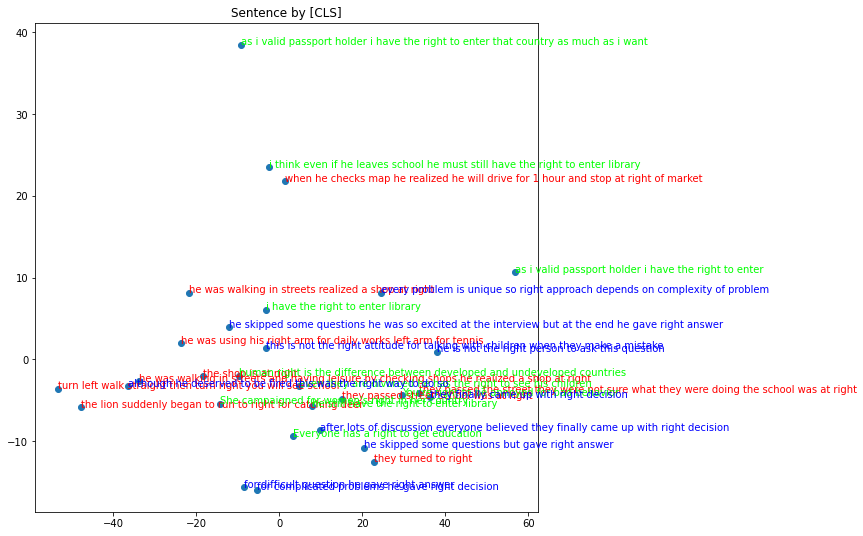

In [67]:
#1)Get [CLS] as sentence embedding
outputs = [ get_sentence_output(tokenizer,model,s).detach().numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,
                    color_by="index10",title="Sentence by [CLS]")


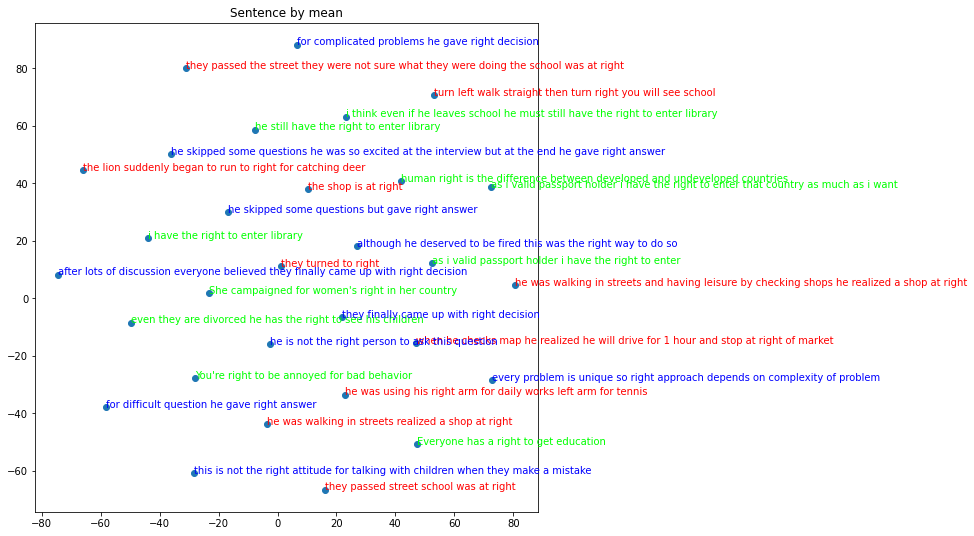

In [9]:

#1)Get mean as sentence embedding
outputs = [ get_sentence_output_bymean(tokenizer,model,s).detach().numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="tsne",dump_3d=False,dump_2d=True,
                    color_by="index10",title="Sentence by mean")


In [10]:
#given sentences,and keywords , get embedding of word in that sentence
#and then reduce the dimension by fitting method(PCA,TSNE or both)
def reduce_dim_draw(sample_sentences,keywords,tokenizer_,model_,fitting="pca",color_by="other"):
    filtered_sentences = []
    word_embeddings = []
    for sent in sample_sentences:
        for keyword in keywords:
            if sent.find(keyword) > -1 :                
                #filtered_sentences.append( sent )
                v = get_word_embeddings(tokenizer_,model_,sent,keyword)[0].vector.detach().numpy()
                word_embeddings.append( v )
                filtered_sentences.append( sent )
    
    word_embeddings = np.array( word_embeddings )
    
    x_reduced = dump_on_surface(word_embeddings,filtered_sentences,dump_3d=False,fitting=fitting,color_by=color_by)
    
    return word_embeddings,filtered_sentences,x_reduced

#given a set of embeddings, calculate cosine of every sentences with each other
def draw_inner_cosine(word_embeddings_,sentences_):
    comparisions = []
    for i in range(len(word_embeddings_)):
        comparision_row = []
        for j in range(len(word_embeddings_)):
            sim = get_similarity(word_embeddings_[i],word_embeddings_[j])
            comparision_row.append(sim)
        comparisions.append( comparision_row )       
    pd.options.display.float_format = '{:,.3f}'.format
    cm = sns.light_palette("blue", as_cmap=True)
    df_eat = pd.DataFrame(data=comparisions ,index=sentences_,columns=sentences_)
    styled_df_eat = df_eat.style.background_gradient(cmap=cm).set_precision(3)
    return styled_df_eat      

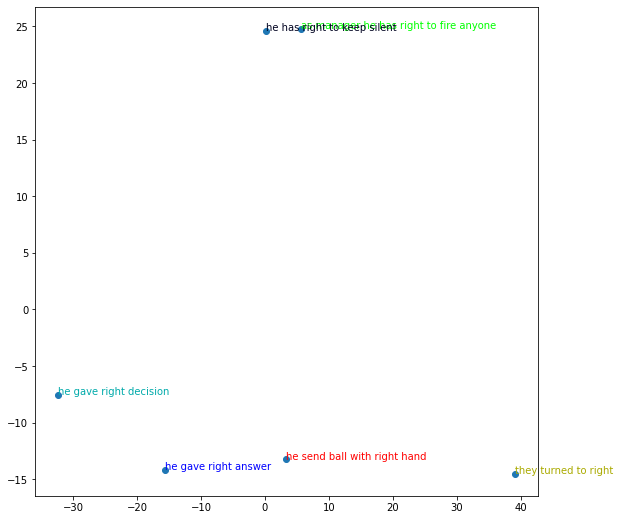

,he send ball with right hand,they turned to right,as manager he has right to fire anyone,he has right to keep silent,he gave right answer,he gave right decision
he send ball with right hand,1.000,0.561,-0.895,-0.970,0.474,-0.012
they turned to right,0.561,1.000,-0.132,-0.343,-0.463,-0.834
as manager he has right to fire anyone,-0.895,-0.132,1.000,0.977,-0.818,-0.437
he has right to keep silent,-0.970,-0.343,0.977,1.000,-0.674,-0.232
he gave right answer,0.474,-0.463,-0.818,-0.674,1.000,0.875
he gave right decision,-0.012,-0.834,-0.437,-0.232,0.875,1.000


In [11]:
#first get an embedding of word "right" on short sentences
right_sentences_short = [ 
"he send ball with right hand",       
"they turned to right",
"as manager he has right to fire anyone",
"he has right to keep silent",
"he gave right answer",
"he gave right decision"]
keywords = ["right"]

word_embeddings,_,x_reduced  = reduce_dim_draw( right_sentences_short,keywords ,tokenizer,model)
df = draw_inner_cosine(x_reduced ,right_sentences_short)
display( df )

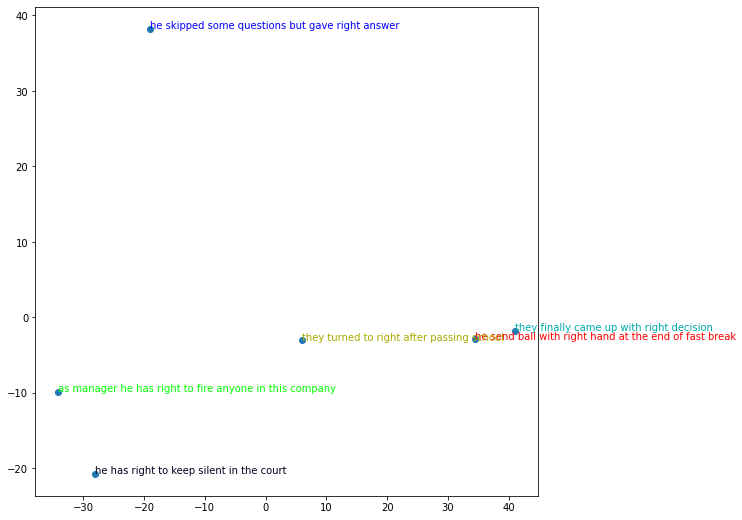

,he send ball with right hand at the end of fast break,they turned to right after passing school,as manager he has right to fire anyone in this company,he has right to keep silent in the court,he skipped some questions but gave right answer,they finally came up with right decision
he send ball with right hand at the end of fast break,1.000,0.926,-0.934,-0.753,-0.520,0.999
they turned to right after passing school,0.926,1.000,-0.730,-0.448,-0.804,0.909
as manager he has right to fire anyone in this company,-0.934,-0.730,1.000,0.938,0.181,-0.948
he has right to keep silent in the court,-0.753,-0.448,0.938,1.000,-0.171,-0.779
he skipped some questions but gave right answer,-0.520,-0.804,0.181,-0.171,1.000,-0.484
they finally came up with right decision,0.999,0.909,-0.948,-0.779,-0.484,1.000


In [12]:
#lets add some more content,make sentence a little bit longer
#get an embedding of word "right" on medium size sentences
right_sentences_medium = [ 
"he send ball with right hand at the end of fast break",       
"they turned to right after passing school",
"as manager he has right to fire anyone in this company",
"he has right to keep silent in the court",
"he skipped some questions but gave right answer",
"they finally came up with right decision"]
keywords = ["right"]

word_embeddings,_,x_reduced  = reduce_dim_draw( right_sentences_medium,keywords ,tokenizer,model)
df = draw_inner_cosine(x_reduced ,right_sentences_medium)
display( df )


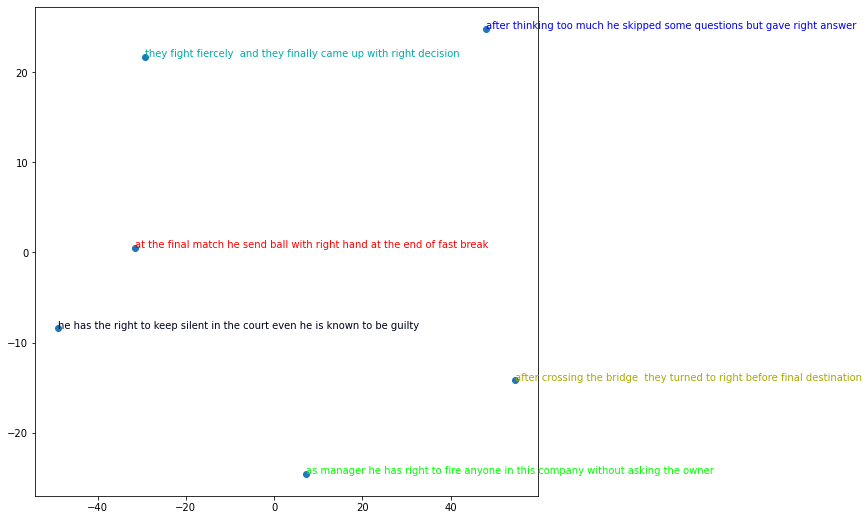

,at the final match he send ball with right hand at the end of fast break,after crossing the bridge they turned to right before final destination,as manager he has right to fire anyone in this company without asking the owner,he has the right to keep silent in the court even he is known to be guilty,after thinking too much he skipped some questions but gave right answer,they fight fiercely and they finally came up with right decision
at the final match he send ball with right hand at the end of fast break,1.000,-0.972,-0.299,0.983,-0.880,0.813
after crossing the bridge they turned to right before final destination,-0.972,1.000,0.515,-0.911,0.744,-0.927
as manager he has right to fire anyone in this company without asking the owner,-0.299,0.515,1.000,-0.116,-0.190,-0.798
he has the right to keep silent in the court even he is known to be guilty,0.983,-0.911,-0.116,1.000,-0.953,0.690
after thinking too much he skipped some questions but gave right answer,-0.880,0.744,-0.190,-0.953,1.000,-0.439
they fight fiercely and they finally came up with right decision,0.813,-0.927,-0.798,0.690,-0.439,1.000


In [13]:
#lets add some more and MORE content,make sentences  longer
#get an embedding of word "right" on long size sentences,
#see how embeddings changed too much
right_sentences_long = [ 
"at the final match he send ball with right hand at the end of fast break",       
"after crossing the bridge  they turned to right before final destination",
"as manager he has right to fire anyone in this company without asking the owner",
"he has the right to keep silent in the court even he is known to be guilty",
"after thinking too much he skipped some questions but gave right answer",
"they fight fiercely  and they finally came up with right decision"]
keywords = ["right"]

word_embeddings,_,x_reduced  = reduce_dim_draw( right_sentences_long,keywords ,tokenizer,model)
df = draw_inner_cosine(x_reduced ,right_sentences_long)
display( df )


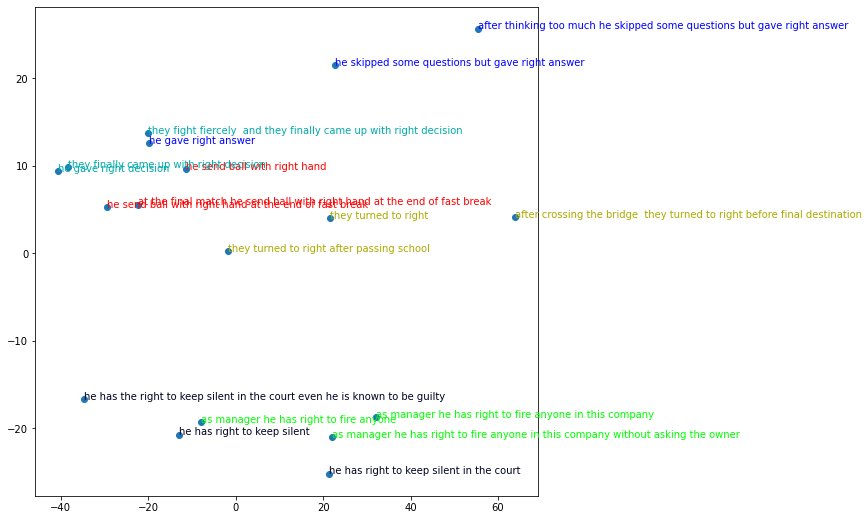

,he send ball with right hand,they turned to right,as manager he has right to fire anyone,he has right to keep silent,he gave right answer,he gave right decision,he send ball with right hand at the end of fast break,they turned to right after passing school,as manager he has right to fire anyone in this company,he has right to keep silent in the court,he skipped some questions but gave right answer,they finally came up with right decision,at the final match he send ball with right hand at the end of fast break,after crossing the bridge they turned to right before final destination,as manager he has right to fire anyone in this company without asking the owner,he has the right to keep silent in the court even he is known to be guilty,after thinking too much he skipped some questions but gave right answer,they fight fiercely and they finally came up with right decision
he send ball with right hand,1.000,-0.629,-0.312,-0.149,0.990,0.887,0.863,0.841,-0.984,-0.987,-0.106,0.898,0.895,-0.717,-0.998,0.405,-0.418,0.995
they turned to right,-0.629,1.000,-0.542,-0.675,-0.732,-0.917,-0.936,-0.950,0.757,0.497,0.840,-0.907,-0.910,0.993,0.586,-0.965,0.969,-0.707
as manager he has right to fire anyone,-0.312,-0.542,1.000,0.986,-0.176,0.161,0.211,0.252,0.139,0.460,-0.912,0.138,0.144,-0.438,0.364,0.742,-0.733,-0.212
he has right to keep silent,-0.149,-0.675,0.986,1.000,-0.009,0.325,0.372,0.411,-0.029,0.305,-0.968,0.302,0.308,-0.583,0.203,0.844,-0.836,-0.045
he gave right answer,0.990,-0.732,-0.176,-0.009,1.000,0.943,0.925,0.908,-0.999,-0.955,-0.244,0.951,0.949,-0.807,-0.981,0.529,-0.541,0.999
he gave right decision,0.887,-0.917,0.161,0.325,0.943,1.000,0.999,0.996,-0.955,-0.802,-0.553,1.000,1.000,-0.958,-0.861,0.781,-0.790,0.930
he send ball with right hand at the end of fast break,0.863,-0.936,0.211,0.372,0.925,0.999,1.000,0.999,-0.938,-0.771,-0.594,0.997,0.998,-0.971,-0.834,0.812,-0.820,0.911
they turned to right after passing school,0.841,-0.950,0.252,0.411,0.908,0.996,0.999,1.000,-0.923,-0.743,-0.628,0.993,0.994,-0.980,-0.810,0.836,-0.843,0.892
as manager he has right to fire anyone in this company,-0.984,0.757,0.139,-0.029,-0.999,-0.955,-0.938,-0.923,1.000,0.943,0.280,-0.962,-0.960,0.829,0.973,-0.560,0.572,-0.997
he has right to keep silent in the court,-0.987,0.497,0.460,0.305,-0.955,-0.802,-0.771,-0.743,0.943,1.000,-0.054,-0.816,-0.813,0.597,0.994,-0.254,0.268,-0.965


In [14]:
#also combine all sentences and check how does it look like when plotted together
right_sentences = right_sentences_short + right_sentences_medium + right_sentences_long

keyword = ["right"]

word_embeddings,_,x_reduced = reduce_dim_draw( right_sentences,keyword ,tokenizer,model)

draw_inner_cosine(x_reduced,right_sentences)

In [15]:
#utility methods for creating dataframe        

def get_df():
    df = pd.DataFrame()
    df["Sentence"] = sentences
    df["Group"] = [ (index // 10) for index,s in enumerate(sentences) ]
    return df

In [16]:
input_df = None
CLASS_NUMS = None
MAX_LEN = 8

input_df = get_df()
CLASS_NUMS = 3


input_df.head(40)

,Sentence,Group
0,the shop is at right,0
1,they turned to right,0
2,he was walking in streets realized a shop at r...,0
3,they passed street school was at right,0
4,he was walking in streets and having leisure b...,0
5,when he checks map he realized he will drive f...,0
6,they passed the street they were not sure what...,0
7,the lion suddenly began to run to right for ca...,0
8,turn left walk straight then turn right you wi...,0
9,he was using his right arm for daily works lef...,0


In [17]:
#create a new XLNet model which will be trained(weights will be altered)
xlnet_tokenizer  = XLNetTokenizer.from_pretrained('xlnet-base-cased') 



In [18]:
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler

class SentimentData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe["Sentence"]
        self.targets = dataframe["Group"]
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        target = self.targets[index]

        return text,target

In [19]:
training_set = SentimentData(input_df, tokenizer, MAX_LEN)
#My dataset is small, I am doing only for visualizing so I dont use test set
train_params = {'batch_size': 4,'shuffle': True}
training_loader = DataLoader(training_set, **train_params)

In [41]:
def freeze_model(model_):
    for param in model_.base_model.parameters():
        param.requires_grad = False

In [42]:
class XLNETClassifier(torch.nn.Module):
                                            
    def __init__(self,nn_tokenizer,nn_model,is_sentence):
        super(XLNETClassifier, self).__init__()
        #nn_model.train()
        self.is_sentence = is_sentence
        self.nn_model = nn_model 
        self.nn_tokenizer = nn_tokenizer
        self.classifier = torch.nn.Linear(768, CLASS_NUMS)

    def forward(self, sentence_list):
        embeddings = None
        if self.is_sentence :            
            embeddings = [get_sentence_output(self.nn_tokenizer,self.nn_model,s) for s in sentence_list ]        
        else:    
            embeddings = [get_word_embeddings(self.nn_tokenizer,self.nn_model,s,"right")[0].vector for s in sentence_list ]        
        embedding_vector = torch.stack(embeddings)
                
        relu_output = torch.nn.ReLU()(embedding_vector)                
        output = self.classifier(relu_output)
        return output

In [43]:
#train Classfier network
def train(epoch,classfier_):

    correct_predictions = 0
    classfier_.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        #get data and labels
        sentence_batch = data[0]
        targets = data[1].to(device, dtype = torch.long)
        #call network forward and calculate loss
        outputs = classfier_(sentence_batch)
        loss = loss_function(outputs, targets)
        #get predictions and compare with actual        
        _, predicted_groups = torch.max(outputs.data, dim=1)        
        correct_predictions += (predicted_groups  == targets).sum().item()
            
        #do back propagation    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    epoch_accu = int( ( correct_predictions * 100 )/len(sentences) )        

    return epoch_accu

In [44]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [45]:


xlnet_model_freezed_sentence = XLNetModel.from_pretrained('xlnet-base-cased')
classfier_freezed_sentence = XLNETClassifier(tokenizer,xlnet_model_freezed_sentence,is_sentence=True)
xlnet_model_freezed_sentence.eval()
freeze_model( xlnet_model_freezed_sentence )
_ = classfier_freezed_sentence.to(device)

In [46]:
xlnet_model_freezed_word = XLNetModel.from_pretrained('xlnet-base-cased')
classfier_freezed_word = XLNETClassifier(tokenizer,xlnet_model_freezed_word,is_sentence=False)

xlnet_model_freezed_word.train()
freeze_model( xlnet_model_freezed_word )
_ = classfier_freezed_word.to(device)

In [47]:
xlnet_model_trained_sentence = XLNetModel.from_pretrained('xlnet-base-cased')
classfier_trained_sentence = XLNETClassifier(tokenizer,xlnet_model_trained_sentence,is_sentence=True)
xlnet_model_trained_sentence.train()
_ = classfier_trained_sentence.to(device)

In [48]:
xlnet_model_trained_word = XLNetModel.from_pretrained('xlnet-base-cased')
classfier_trained_word = XLNETClassifier(tokenizer,xlnet_model_trained_word,is_sentence=False)
xlnet_model_trained_word.train()
_ = classfier_trained_word.to(device)

In [49]:
pytorch_total_params = sum(p.numel() for p in xlnet_model_freezed_sentence.parameters() if p.requires_grad)    
pytorch_trainable_params = sum(p.numel() for p in xlnet_model_freezed_sentence.parameters() )    
print("Total number of params", pytorch_total_params)
print("Total number of trainable params", pytorch_trainable_params)

Total number of params 0
Total number of trainable params 116718336


In [50]:
#classfier

In [51]:
pytorch_total_params = sum(p.numel() for p in classfier_freezed_word.parameters() if p.requires_grad)    
pytorch_trainable_params = sum(p.numel() for p in classfier_freezed_word.parameters() )    
print("Total number of params", pytorch_total_params)
print("Total number of trainable params", pytorch_trainable_params)

Total number of params 2307
Total number of trainable params 116720643


In [52]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  classfier_freezed_sentence.parameters(), lr=1e-05)


EPOCHS = 30
for epoch in range(EPOCHS):
    epoch_accu = train(epoch,classfier_freezed_sentence)
    print(f"At Epoch {epoch+1}  Accuracy : {epoch_accu}" )
    if epoch_accu > 97:
        break


8it [00:02,  3.23it/s]
0it [00:00, ?it/s]

At Epoch 1  Accuracy : 40


8it [00:02,  3.18it/s]
0it [00:00, ?it/s]

At Epoch 2  Accuracy : 30


8it [00:04,  1.93it/s]
0it [00:00, ?it/s]

At Epoch 3  Accuracy : 33


8it [00:02,  2.74it/s]
0it [00:00, ?it/s]

At Epoch 4  Accuracy : 36


8it [00:02,  3.11it/s]
0it [00:00, ?it/s]

At Epoch 5  Accuracy : 40


8it [00:02,  2.92it/s]
0it [00:00, ?it/s]

At Epoch 6  Accuracy : 20


8it [00:02,  3.10it/s]
0it [00:00, ?it/s]

At Epoch 7  Accuracy : 30


8it [00:02,  2.90it/s]
0it [00:00, ?it/s]

At Epoch 8  Accuracy : 33


8it [00:03,  2.17it/s]
0it [00:00, ?it/s]

At Epoch 9  Accuracy : 33


8it [00:03,  2.51it/s]
0it [00:00, ?it/s]

At Epoch 10  Accuracy : 43


8it [00:02,  2.77it/s]
0it [00:00, ?it/s]

At Epoch 11  Accuracy : 40


8it [00:02,  3.23it/s]
0it [00:00, ?it/s]

At Epoch 12  Accuracy : 33


8it [00:02,  2.68it/s]
0it [00:00, ?it/s]

At Epoch 13  Accuracy : 33


8it [00:02,  3.47it/s]
0it [00:00, ?it/s]

At Epoch 14  Accuracy : 33


8it [00:01,  4.02it/s]
0it [00:00, ?it/s]

At Epoch 15  Accuracy : 43


8it [00:02,  3.96it/s]
0it [00:00, ?it/s]

At Epoch 16  Accuracy : 40


8it [00:01,  4.00it/s]
0it [00:00, ?it/s]

At Epoch 17  Accuracy : 23


8it [00:02,  3.47it/s]
0it [00:00, ?it/s]

At Epoch 18  Accuracy : 30


8it [00:01,  4.05it/s]
0it [00:00, ?it/s]

At Epoch 19  Accuracy : 40


8it [00:01,  4.00it/s]
0it [00:00, ?it/s]

At Epoch 20  Accuracy : 40


8it [00:02,  3.92it/s]
0it [00:00, ?it/s]

At Epoch 21  Accuracy : 26


8it [00:02,  3.93it/s]
0it [00:00, ?it/s]

At Epoch 22  Accuracy : 26


8it [00:02,  3.07it/s]
0it [00:00, ?it/s]

At Epoch 23  Accuracy : 33


8it [00:02,  3.06it/s]
0it [00:00, ?it/s]

At Epoch 24  Accuracy : 36


8it [00:02,  3.21it/s]
0it [00:00, ?it/s]

At Epoch 25  Accuracy : 40


8it [00:02,  3.78it/s]
0it [00:00, ?it/s]

At Epoch 26  Accuracy : 43


8it [00:02,  3.05it/s]
0it [00:00, ?it/s]

At Epoch 27  Accuracy : 40


8it [00:02,  2.85it/s]
0it [00:00, ?it/s]

At Epoch 28  Accuracy : 36


8it [00:03,  2.48it/s]
0it [00:00, ?it/s]

At Epoch 29  Accuracy : 50


8it [00:02,  3.67it/s]

At Epoch 30  Accuracy : 43


In [53]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  classfier_freezed_word.parameters(), lr=1e-05)


EPOCHS = 30
for epoch in range(EPOCHS):
    epoch_accu = train(epoch,classfier_freezed_word)
    print(f"At Epoch {epoch+1}  Accuracy : {epoch_accu}" )
    if epoch_accu > 97:
        break

8it [00:02,  3.07it/s]
0it [00:00, ?it/s]

At Epoch 1  Accuracy : 33


8it [00:02,  3.59it/s]
0it [00:00, ?it/s]

At Epoch 2  Accuracy : 33


8it [00:02,  3.70it/s]
0it [00:00, ?it/s]

At Epoch 3  Accuracy : 30


8it [00:02,  3.84it/s]
0it [00:00, ?it/s]

At Epoch 4  Accuracy : 33


8it [00:02,  3.59it/s]
0it [00:00, ?it/s]

At Epoch 5  Accuracy : 33


8it [00:02,  3.51it/s]
0it [00:00, ?it/s]

At Epoch 6  Accuracy : 33


8it [00:02,  3.17it/s]
0it [00:00, ?it/s]

At Epoch 7  Accuracy : 33


8it [00:02,  3.21it/s]
0it [00:00, ?it/s]

At Epoch 8  Accuracy : 30


8it [00:02,  3.44it/s]
0it [00:00, ?it/s]

At Epoch 9  Accuracy : 33


8it [00:02,  3.89it/s]
0it [00:00, ?it/s]

At Epoch 10  Accuracy : 36


8it [00:02,  3.83it/s]
0it [00:00, ?it/s]

At Epoch 11  Accuracy : 33


8it [00:02,  3.35it/s]
0it [00:00, ?it/s]

At Epoch 12  Accuracy : 33


8it [00:02,  3.44it/s]
0it [00:00, ?it/s]

At Epoch 13  Accuracy : 30


8it [00:02,  3.24it/s]
0it [00:00, ?it/s]

At Epoch 14  Accuracy : 33


8it [00:02,  3.01it/s]
0it [00:00, ?it/s]

At Epoch 15  Accuracy : 40


8it [00:02,  3.47it/s]
0it [00:00, ?it/s]

At Epoch 16  Accuracy : 30


8it [00:02,  2.94it/s]
0it [00:00, ?it/s]

At Epoch 17  Accuracy : 36


8it [00:02,  3.26it/s]
0it [00:00, ?it/s]

At Epoch 18  Accuracy : 33


8it [00:02,  3.33it/s]
0it [00:00, ?it/s]

At Epoch 19  Accuracy : 33


8it [00:03,  2.60it/s]
0it [00:00, ?it/s]

At Epoch 20  Accuracy : 33


8it [00:04,  1.82it/s]
0it [00:00, ?it/s]

At Epoch 21  Accuracy : 30


8it [00:03,  2.01it/s]
0it [00:00, ?it/s]

At Epoch 22  Accuracy : 26


8it [00:03,  2.54it/s]
0it [00:00, ?it/s]

At Epoch 23  Accuracy : 33


8it [00:02,  2.87it/s]
0it [00:00, ?it/s]

At Epoch 24  Accuracy : 40


8it [00:04,  1.67it/s]
0it [00:00, ?it/s]

At Epoch 25  Accuracy : 30


8it [00:04,  1.80it/s]
0it [00:00, ?it/s]

At Epoch 26  Accuracy : 33


8it [00:06,  1.31it/s]
0it [00:00, ?it/s]

At Epoch 27  Accuracy : 30


8it [00:03,  2.27it/s]
0it [00:00, ?it/s]

At Epoch 28  Accuracy : 43


8it [00:03,  2.27it/s]
0it [00:00, ?it/s]

At Epoch 29  Accuracy : 30


8it [00:03,  2.51it/s]

At Epoch 30  Accuracy : 40


In [54]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  classfier_trained_sentence.parameters(), lr=1e-05)


EPOCHS = 30
for epoch in range(EPOCHS):
    epoch_accu = train(epoch,classfier_trained_sentence)
    print(f"At Epoch {epoch+1}  Accuracy : {epoch_accu}")
    if epoch_accu > 97:
        break

8it [00:34,  4.32s/it]
0it [00:00, ?it/s]

At Epoch 1  Accuracy : 43


8it [00:36,  4.61s/it]
0it [00:00, ?it/s]

At Epoch 2  Accuracy : 40


8it [00:34,  4.28s/it]
0it [00:00, ?it/s]

At Epoch 3  Accuracy : 63


8it [00:43,  5.47s/it]
0it [00:00, ?it/s]

At Epoch 4  Accuracy : 63


8it [00:38,  4.82s/it]
0it [00:00, ?it/s]

At Epoch 5  Accuracy : 80


8it [00:32,  4.05s/it]
0it [00:00, ?it/s]

At Epoch 6  Accuracy : 76


8it [00:33,  4.15s/it]
0it [00:00, ?it/s]

At Epoch 7  Accuracy : 90


8it [00:37,  4.75s/it]
0it [00:00, ?it/s]

At Epoch 8  Accuracy : 86


8it [00:38,  4.84s/it]
0it [00:00, ?it/s]

At Epoch 9  Accuracy : 96


8it [00:42,  5.31s/it]
0it [00:00, ?it/s]

At Epoch 10  Accuracy : 93


8it [00:46,  5.75s/it]
0it [00:00, ?it/s]

At Epoch 11  Accuracy : 93


8it [00:44,  5.59s/it]

At Epoch 12  Accuracy : 100


In [55]:

# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  classfier_trained_word.parameters(), lr=1e-05)


EPOCHS = 30
for epoch in range(EPOCHS):
    epoch_accu = train(epoch,classfier_trained_word)
    print(f"At Epoch {epoch+1}  Accuracy : {epoch_accu}")
    if epoch_accu > 97:
        break

8it [00:46,  5.77s/it]
0it [00:00, ?it/s]

At Epoch 1  Accuracy : 30


8it [00:42,  5.37s/it]
0it [00:00, ?it/s]

At Epoch 2  Accuracy : 53


8it [00:47,  5.88s/it]
0it [00:00, ?it/s]

At Epoch 3  Accuracy : 66


8it [01:04,  8.04s/it]
0it [00:00, ?it/s]

At Epoch 4  Accuracy : 90


8it [01:16,  9.59s/it]
0it [00:00, ?it/s]

At Epoch 5  Accuracy : 86


8it [01:39, 12.41s/it]
0it [00:00, ?it/s]

At Epoch 6  Accuracy : 83


8it [01:17,  9.72s/it]
0it [00:00, ?it/s]

At Epoch 7  Accuracy : 93


8it [00:58,  7.36s/it]
0it [00:00, ?it/s]

At Epoch 8  Accuracy : 93


8it [01:07,  8.40s/it]

At Epoch 9  Accuracy : 100


In [56]:
#put XLNet trained model into eval mode
_ = xlnet_model_trained_sentence.eval()
_ = xlnet_model_trained_word.eval()

_ = xlnet_model_freezed_sentence.eval()
_ = xlnet_model_freezed_word.eval()

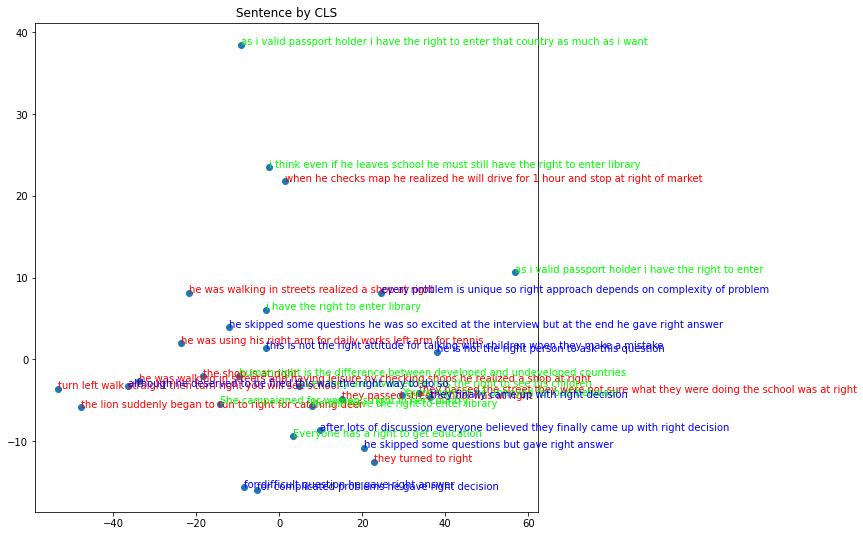

In [66]:
#1)Get Poolmean as sentence embedding
outputs = [ get_sentence_output(xlnet_tokenizer,xlnet_model_freezed_sentence,s).numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,
                    color_by="index10",title="Sentence by CLS freezed_sentence")

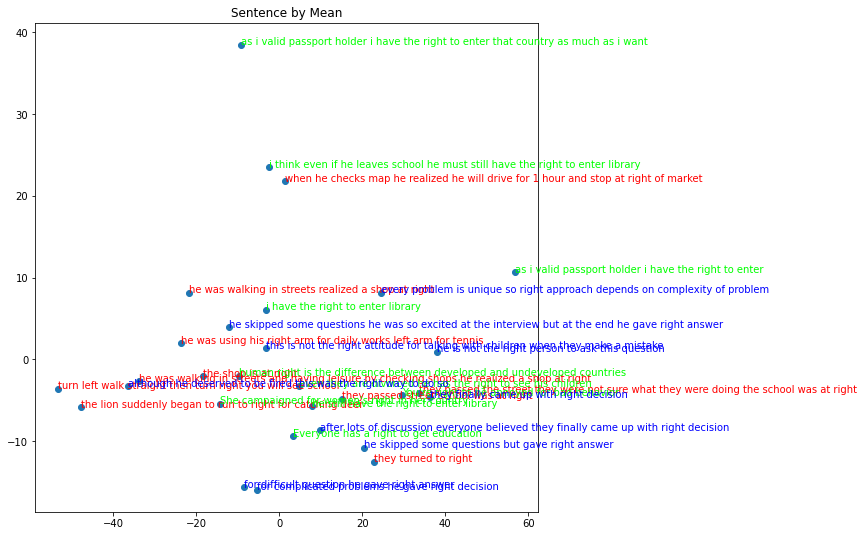

In [61]:
#1)Get Poolmean as sentence embedding
outputs = [ get_sentence_output(xlnet_tokenizer,xlnet_model_freezed_word,s).detach().numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,
                    color_by="index10",title="Sentence by Mean freezed_word")

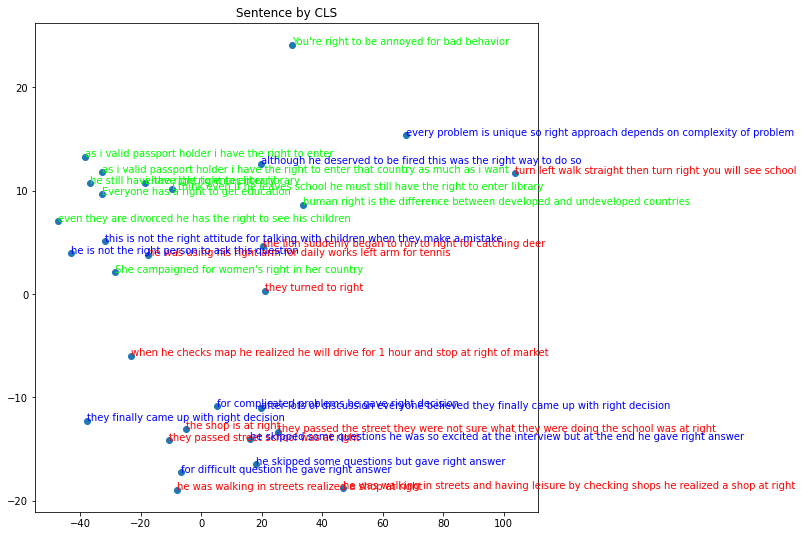

In [57]:
outputs = [ get_word_embeddings(xlnet_tokenizer,xlnet_model_freezed_sentence,s,"right")[0].vector.detach().numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,color_by="index10",
                    title="Sentence by CLS")



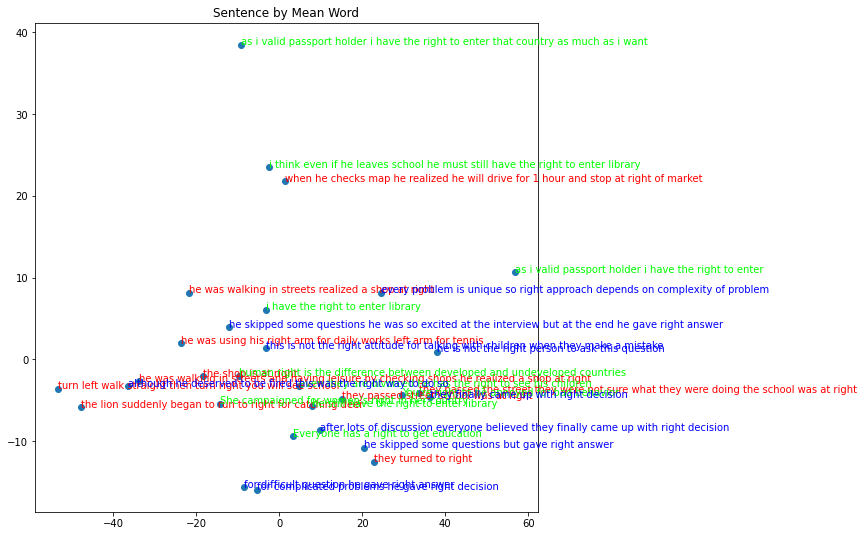

In [68]:
#1)Get Poolmean as sentence embedding
outputs = [ get_sentence_output(xlnet_tokenizer,xlnet_model_freezed_word,s).detach().numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,
                    color_by="index10",title="Sentence by Mean Word")




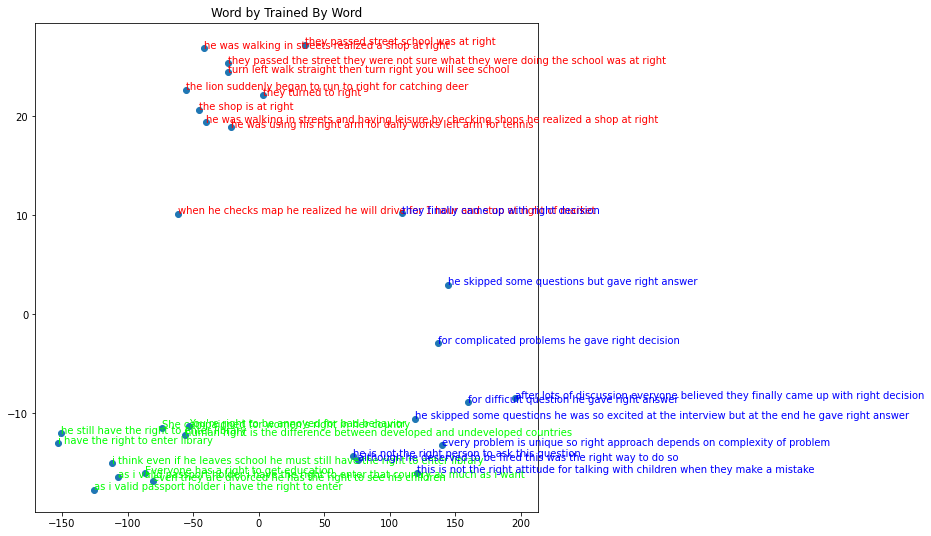

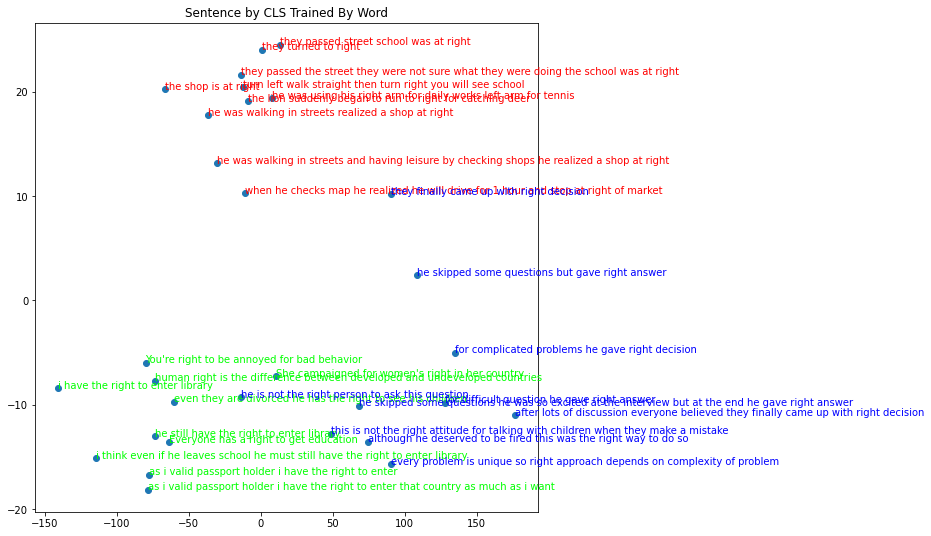

In [73]:

outputs = [ get_word_embeddings(xlnet_tokenizer,xlnet_model_trained_word,s,"right")[0].vector.detach().numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,color_by="index10",
                    title="Word by Trained By Word")


outputs = [ get_sentence_output(xlnet_tokenizer,xlnet_model_trained_word,s).detach().numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,color_by="index10",
                    title="Sentence by CLS Trained By Word")






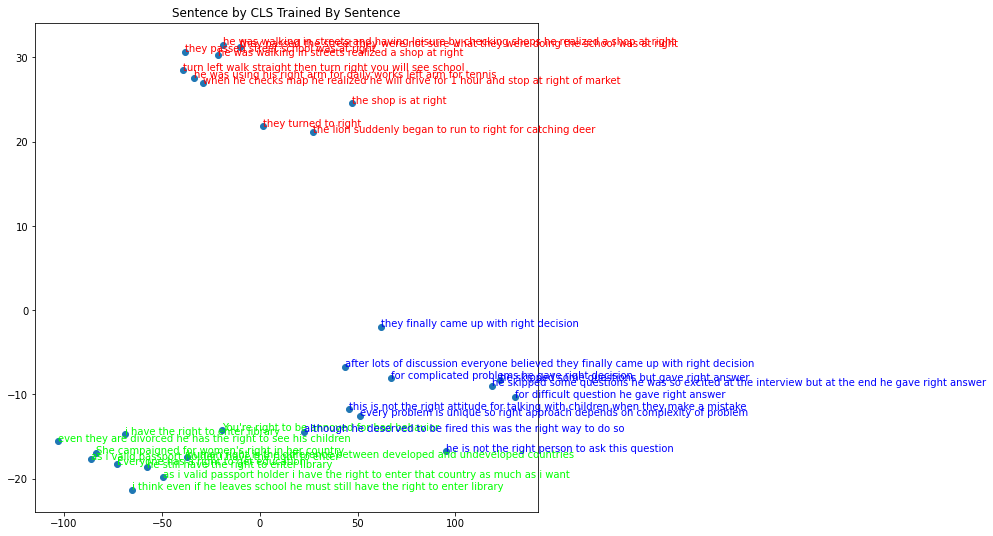

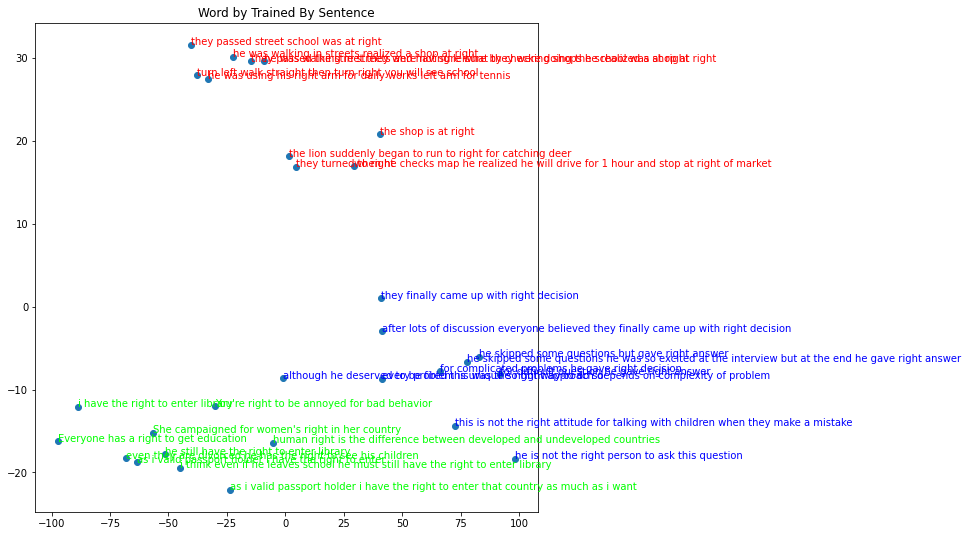

In [72]:
#1)Get CLS as sentence embedding
outputs = [ get_sentence_output(xlnet_tokenizer,xlnet_model_trained_sentence,s).detach().numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,color_by="index10",
                    title="Sentence by CLS Trained By Sentence")

outputs = [ get_word_embeddings(xlnet_tokenizer,xlnet_model_trained_sentence,s,"right")[0].vector.detach().numpy() for s in sentences]
_ = dump_on_surface(outputs,sentences,fitting="pca",dump_3d=False,dump_2d=True,color_by="index10",
                    title="Word by Trained By Sentence")